In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score

In [4]:
movies = pd.read_csv('movie_metadata_cleaning2.csv')
movies.Director_ID.fillna(movies.Director_ID.mean(), inplace=True)

movies.Director_ID = movies.Director_ID.astype('int64')


movies_backup = movies

In [57]:
movies_without_usa = movies[movies.country !=1]
movies_without_usa.to_csv('movie_metadata_without_usa.csv', index=False)
y = movies_without_usa.target
movies_without_usa.drop(['target'], axis=1, inplace=True)

/Users/gmachado/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [43]:
x_train, x_test, y_train, y_test = train_test_split(movies_without_usa, y,test_size=0.3, random_state=42)

In [31]:
regression = LinearRegression()
regression.fit(x_train, y_train)
outputs = regression.predict(x_test)
regression.score(x_test, outputs)

1.0

In [32]:
print(len(x_test))

1500


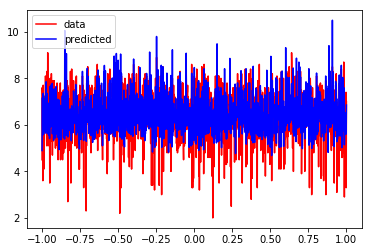

In [33]:
plt.plot(np.linspace(-1, 1, 1500), y_test, color='red', label='data')
plt.plot(np.linspace(-1, 1, 1500), outputs, color='blue', label='predicted')
plt.legend()
plt.show()

In [36]:
ridge =  Ridge(alpha=0.1, normalize=True)
ridge.fit(x_train, y_train)
outputs_ridge = ridge.predict(x_test)


ridge.score(movies, y)

0.46110322972014905

In [38]:
from sklearn.linear_model import Lasso
lasso =  Lasso(alpha=0.1, normalize=True)
lasso.fit(x_train, y_train)
outputs_lasso = lasso.predict(x_test)


lasso.score(movies, y)


-7.179942058788136e-05

In [39]:

rmse = np.sqrt(mean_squared_error(y_test, outputs))
rmse_ridge = np.sqrt(mean_squared_error(y_test, outputs_ridge))
rmse_lasso = np.sqrt(mean_squared_error(y_test, outputs_lasso))
print("Root Mean Squared Error: {}".format(rmse))
print("Root Mean Squared Error: {}".format(rmse_ridge))
print("Root Mean Squared Error: {}".format(rmse_lasso))

Root Mean Squared Error: 0.822235560261247
Root Mean Squared Error: 0.8265696215436169
Root Mean Squared Error: 1.1183668443993307


In [27]:

cvscores_3 = cross_val_score(ridge, x_train, y_train, cv=10)
print(np.mean(cvscores_3))

0.456334843679417


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# steps
steps = [('scaler', StandardScaler()),
         ('ridge', Ridge())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'ridge__alpha':np.logspace(-4, 0, 50)}

# Create the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
cv.fit(x_train, y_train)

#predict on train set
y_pred_train=cv.predict(x_train)

# Predict test set
y_pred_test=cv.predict(x_test)

# rmse on train set
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse

0.7797760879588737

In [8]:
movies_without_content_rating = movies.drop(['content_rating'], axis=1)
movies_without_content_rating.to_csv('movie_metadata_without_content_rating.csv', index=False)

In [9]:
movies_without_budget = movies.drop(['budget'], axis=1)
movies_without_budget.to_csv('movie_metadata_without_budget.csv', index=False)

In [10]:
movies_without_country = movies.drop(['country'], axis=1)
movies_without_country.to_csv('movie_metadata_without_country.csv', index=False)

In [13]:
movies_without_director = movies.drop(['Director_ID'], axis=1)
movies_without_director.to_csv('movie_metadata_director.csv', index=False)